# Loading libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
mental_df = pd.read_csv("Student_Mental_health.csv")

# Accessing

In [3]:
print(mental_df.shape)
mental_df.head()

(101, 11)


,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [4]:
mental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [5]:
null_values = mental_df.isnull().sum()
null_values[null_values > 0]

Age    1
dtype: int64

In [6]:
mental_df = mental_df.dropna()
mental_df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [7]:
mental_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100.0,20.53,2.49628,18.0,18.0,19.0,23.0,24.0


In [8]:
sum(mental_df.duplicated())

0

In [9]:
mental_df.columns.to_list()

['Timestamp',
 'Choose your gender',
 'Age',
 'What is your course?',
 'Your current year of Study',
 'What is your CGPA?',
 'Marital status',
 'Do you have Depression?',
 'Do you have Anxiety?',
 'Do you have Panic attack?',
 'Did you seek any specialist for a treatment?']

In [10]:
mental_df["What is your course?"].value_counts()

BCS                        18
Engineering                17
BIT                         9
Biomedical science          4
KOE                         4
BENL                        2
Laws                        2
psychology                  2
Engine                      2
Islamic Education           1
Biotechnology               1
engin                       1
Econs                       1
MHSC                        1
Malcom                      1
Kop                         1
Human Sciences              1
Communication               1
Nursing                     1
Diploma Nursing             1
IT                          1
Pendidikan Islam            1
Radiography                 1
Fiqh fatwa                  1
DIPLOMA TESL                1
Koe                         1
Fiqh                        1
CTS                         1
koe                         1
Benl                        1
Kirkhs                      1
Mathemathics                1
Pendidikan islam            1
Human Reso

In [11]:
mental_df["What is your CGPA?"].value_counts()

3.50 - 4.00     47
3.00 - 3.49     43
2.50 - 2.99      4
0 - 1.99         3
2.00 - 2.49      2
3.50 - 4.00      1
Name: What is your CGPA?, dtype: int64

In [12]:
mental_df["Your current year of Study"].value_counts()

year 1    40
Year 3    19
Year 2    16
year 2    10
year 4     8
year 3     5
Year 1     2
Name: Your current year of Study, dtype: int64

# Data wrangling

In [13]:
mental_df["Your current year of Study"] = mental_df["Your current year of Study"].str.lower()
mental_df["Your current year of Study"].value_counts()

year 1    42
year 2    26
year 3    24
year 4     8
Name: Your current year of Study, dtype: int64

In [14]:
mental_df["Timestamp"] = pd.to_datetime(mental_df["Timestamp"])
mental_df.head(3)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,2020-08-07 12:02:00,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,2020-08-07 12:04:00,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,2020-08-07 12:05:00,Male,19.0,BIT,year 1,3.00 - 3.49,No,Yes,Yes,Yes,No


In [15]:
mental_df["Age"] = mental_df["Age"].astype("int64")
assert mental_df["Age"].dtype == "int64"

In [16]:
mental_df["What is your CGPA?"] = mental_df["What is your CGPA?"].astype("category")
mental_df["What is your CGPA?"].dtype

CategoricalDtype(categories=['0 - 1.99', '2.00 - 2.49', '2.50 - 2.99', '3.00 - 3.49',
                  '3.50 - 4.00', '3.50 - 4.00 '],
, ordered=False)

# Feature Engineering

In [17]:
day_of_week = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}
mental_df["Weekday name"] = mental_df["Timestamp"].dt.dayofweek.map(day_of_week)
mental_df.head(3)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,Weekday name
0,2020-08-07 12:02:00,Female,18,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No,Friday
1,2020-08-07 12:04:00,Male,21,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No,Friday
2,2020-08-07 12:05:00,Male,19,BIT,year 1,3.00 - 3.49,No,Yes,Yes,Yes,No,Friday


# Exploratory Data Analysis

## Univariate Exploration

### How often do students seek treatment from specialist?

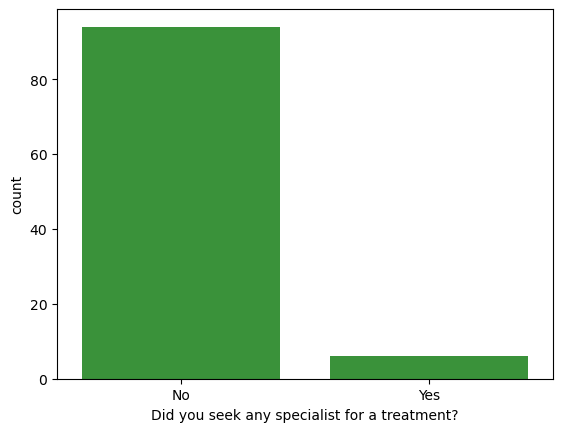

In [18]:
base_color = sns.color_palette()[2]
sns.countplot(x="Did you seek any specialist for a treatment?", color = base_color, data=mental_df)
plt.show()

**Observation**

- From the datasets it shows over 90% of students hardly seek medical treatment while those that seek are are just around 6%

### What Age group is the most popular?

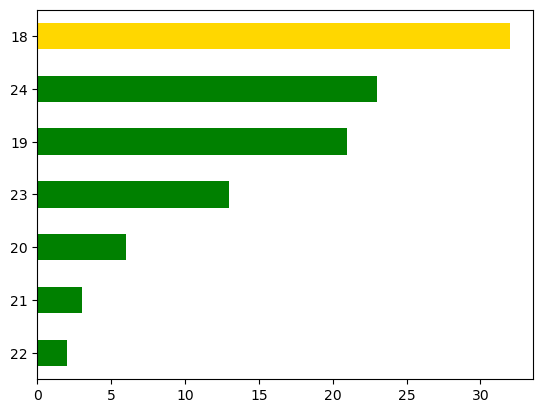

In [19]:
colors = ["green", "green", "green", "green", "green", "green", "gold"]
mental_df["Age"].value_counts().sort_values().plot(kind="barh", color=colors)
plt.show()

**Observation**

- Those around the age of 18 are the most popular Age group from this data while those around 22 years are the least most popular.

### What Gender is the most popular

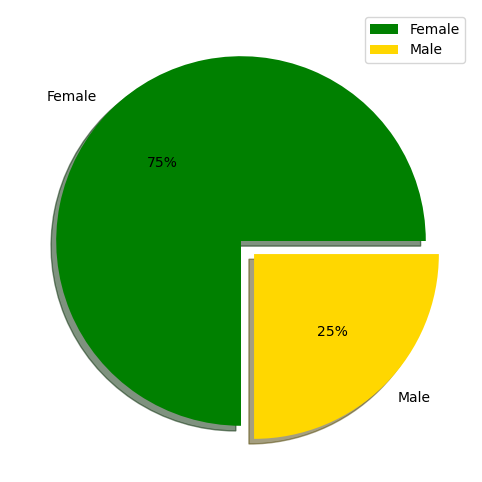

In [20]:
colors = ("green", "gold")
sorted_columns = mental_df["Choose your gender"].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sorted_columns, labels=sorted_columns.index, autopct="%.0f%%", explode = (0, 0.1), colors=colors, shadow=True)
plt.legend()
plt.show()

**Observation**

- The Female gender are the most popular which is 75% while the male is 25%

### What are the 10 most study course among the students?

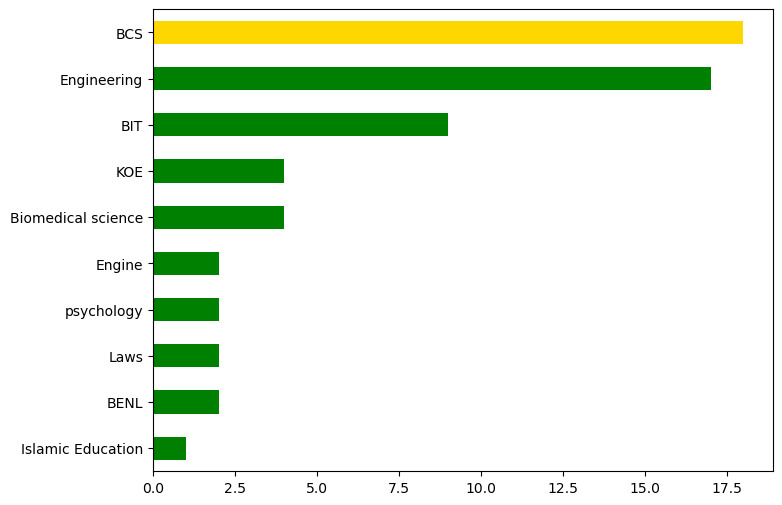

In [21]:
colors = ["green", "green", "green", "green", "green", "green", "green", "green", "green", "gold"]
top_10_course = mental_df["What is your course?"].value_counts()[:10].sort_values()
top_10_course.plot(kind="barh", color=colors, figsize=(8, 6))
plt.show()

**Observation**

- The most studied course is BCS, which is followed by Enginnering and 8 of the top 10 courses are science courses while the others are humanities and education 

### What is most popular martial status?

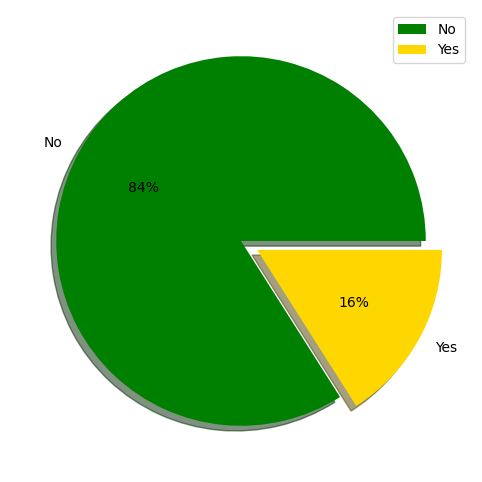

In [22]:
colors = ("green", "gold")
sorted_columns = mental_df["Marital status"].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sorted_columns, labels=sorted_columns.index, autopct="%.0f%%", explode = (0, 0.1), colors=colors, shadow=True)
plt.legend()
plt.show()

**Observation**

- The most common marital status is No which means 84% of the students are not married while 16% is Yes which means they are married

### What year is the least from the students?

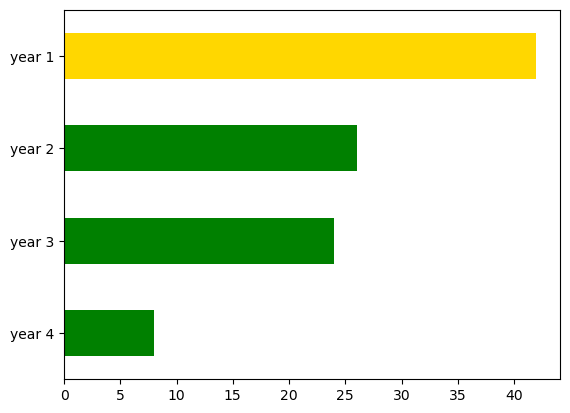

In [23]:
colors = ["green", "green", "green", "gold"]
mental_df["Your current year of Study"].value_counts().sort_values().plot(kind="barh", color=colors)
plt.show()

**Observation**

- Year 4 happens to be the least among the students while Year 1 is the most popular among the student

### What percentage of students are depressed?

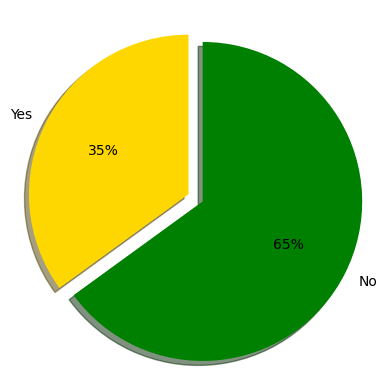

In [24]:
colors = ["green", "gold"]

sorted_counts = mental_df["Do you have Depression?"].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, 
       counterclock = False, autopct="%.0f%%", shadow=True, explode=(0, 0.1), colors=colors);
plt.axis("square");

**Observation**

- 35% of the students are depressed while just 65% of the students are not depressed

## Bivariate Exploration

In [25]:
# Function to plot and display a countplot 
def count_plot(x, hue, palette, data):
    sns.countplot(x=x, hue=hue, palette=palette, data=data)
    plt.show()

### What gender are most likely to experienced anxiety?

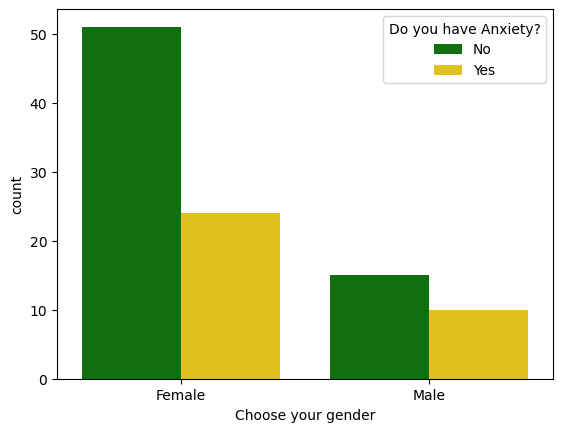

In [26]:
colors = ["green", "gold"]
count_plot(x="Choose your gender", hue="Do you have Anxiety?", palette=colors, data=mental_df)

**Observation**

- Females are the most common gender to experienced anxiety the most 

### What year are the students less likely to experienced panic attack?

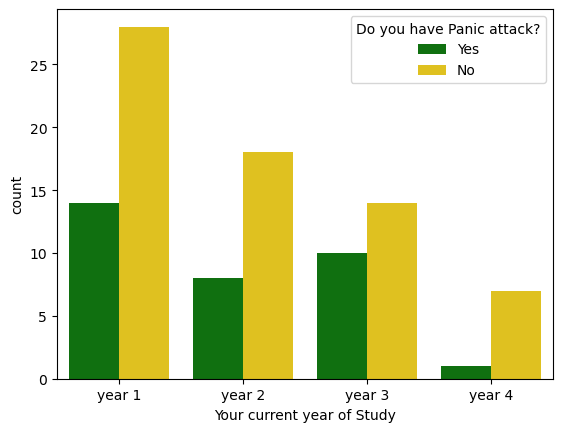

In [27]:
colors = ["green", "gold"] 
count_plot(x="Your current year of Study", hue="Do you have Panic attack?", palette=colors, data=mental_df)

**Observation**

- Year 4 is the year students are less likely to experienced Panic attach while Year 1 are most likely to experienced panic attack

### What C.G.P.A makes students more depressed? 

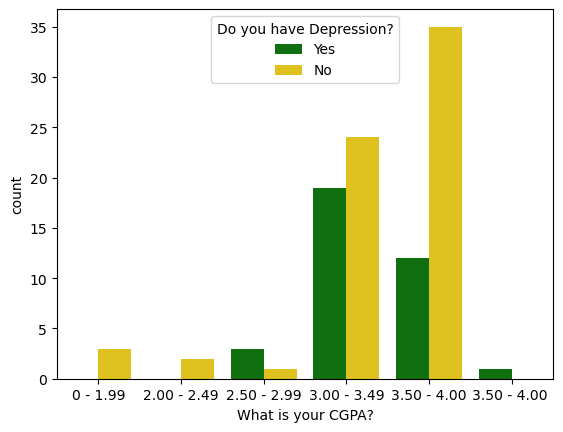

In [28]:
color = ["green", "gold"] 
count_plot(x="What is your CGPA?", hue="Do you have Depression?", palette=color, data=mental_df)

**Observation**

- Students experienced depression at C.G.P.A of around `3.00-3.49` the most while those around `0-1.99` doesn't experienced no sort of depression.

### What is the distribution of the age across each year of study?

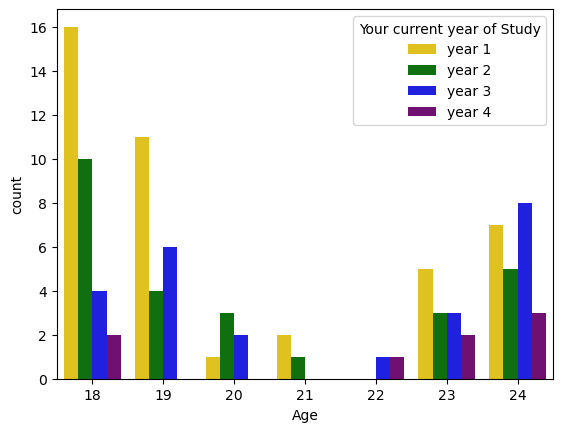

In [29]:
colors = ["gold", "green", "blue", "purple"] 
count_plot(x="Age", hue="Your current year of Study", palette=colors, data=mental_df)

**Obseravtion**

- The Youngest students are the mostly in Year 1 which are 18 years followed by 19 years which are also in Year 1 and the least Age are 22 years which are in Year 2 and 3.

### What gender are most likely to seek treatment from specialist?

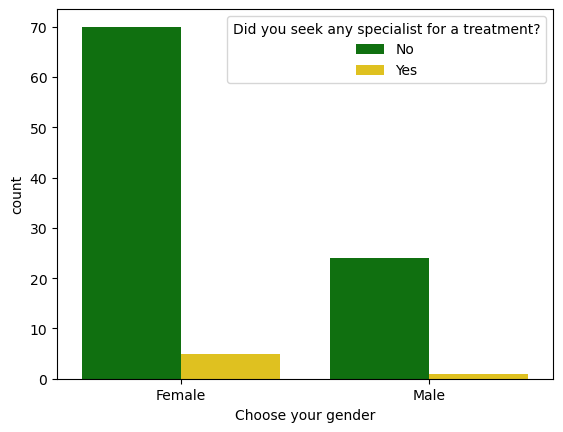

In [30]:
colors = ["green", "gold"]
count_plot(x="Choose your gender", hue="Did you seek any specialist for a treatment?", palette=colors, data=mental_df)

**Observation**

- The Females are the most likely to seek treatment from gender the most followed by male

### Multivariate Exploration

### What is the average age of students in each year that experienced anxiety?

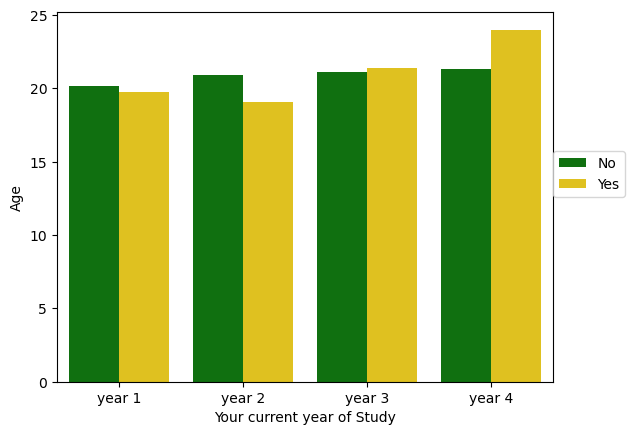

In [31]:
colors = ["green", "gold"]
sns.barplot(y="Age", x="Your current year of Study", hue="Do you have Anxiety?", ci=None, palette=colors, data=mental_df)
plt.legend(loc=(1, 0.5))

**Observation**

- The average of those in Year 1 is around 18. Year 4 has the highest average of about 24 to experienced anxiety.